In [2]:
import numpy as np
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
#import seaborn as sns

In [18]:
def plot_correlation(image, gamma_min=1, gamma_max=None):
    assert gamma_min >= 0
    if gamma_max is not None:
        gamma_max += 1
    else:
        gamma_max = len(image)-1
    if gamma_max == len(image):
        gamma_max -= 1
    assert gamma_max < len(image)
    results = []
    for i, gamma in enumerate(range(gamma_min,gamma_max)):
        results.append(m2(image, gamma))
        print(gamma, results[-1])
    pylab.plot(range(gamma_min, gamma_max), results)
    ymin = min(results)
    ymax = max(results)
    ymin *= 0.99
    ymax *= 1.01
    pylab.ylim(ymin, ymax)
    pylab.xlim(gamma_min, gamma_max-1)
    return np.array(results)

In [12]:
def m2(image, gamma):
    mean = np.mean(image)
    binned = binner(image, gamma)
    top = np.mean(np.square(binned - mean))
    bottom = np.mean(np.square(image - mean))
    if bottom == 0:
        return 1
    else:
        return top/bottom

In [13]:
# EXPLAINED
def m2(image, gamma):
    # Compute the mean of the image; this is the "reference" value that we will be
    # comparing the original and the modified image to
    mean = np.mean(image)
    # Modify the image to capture the information you want
    binned = binner(image, gamma)
    # Compute the difference between the modified image and the reference
    top = np.mean(np.square(binned - mean))
    # Compute the difference between the original image and the reference
    bottom = np.mean(np.square(image - mean))
    # Return the ratio of those two
    if bottom == 0:
        return 1
    else:
        return top/bottom

In [14]:
def binner(image, gamma):
    xmax, ymax = image.shape
    assert xmax == ymax
    image = image.copy()
    for (x,y), value in np.ndenumerate(image):
        xindices = make_range(x, gamma, xmax)
        yindices = make_range(y, gamma, ymax)
        bin = image[xindices[np.newaxis, :].T, yindices]
        #print(xindices, yindices)
        image[x,y] = np.mean(bin)
    return image

In [15]:
def make_range(i, gamma, max_):
    indices = np.array(range(i-gamma, i+gamma+1))
    indices[indices < 0] += max_
    indices[indices > max_-1] -= max_
    return indices

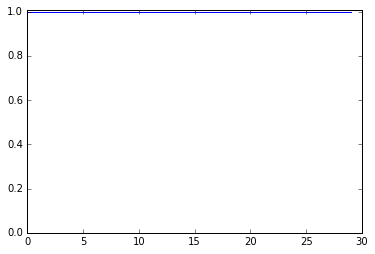

In [33]:
zeros = np.zeros((100,100), dtype=float)
plot_correlation(zeros, 0, 30)

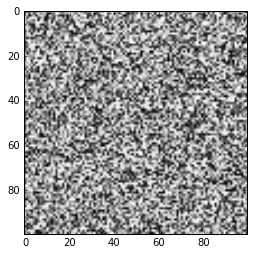

In [31]:
random = np.random.random((100,100))
pylab.imshow(random, cmap='Greys_r');

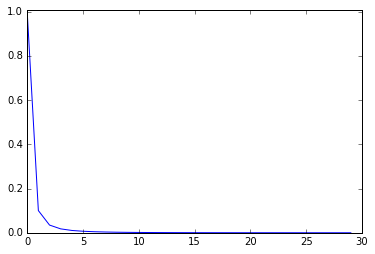

In [35]:
plot_correlation(random, 0, 30)

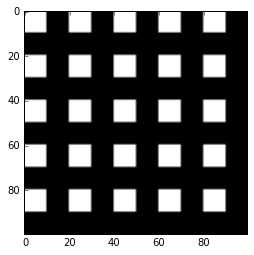

In [34]:
blocks = np.zeros((100,100), dtype=np.float)
block_size = 10
for (x,y),value in np.ndenumerate(blocks):
    if x%(block_size*2) < block_size and y%(block_size*2) < block_size:
        blocks[x,y] = 1
pylab.imshow(blocks, cmap='Greys_r');

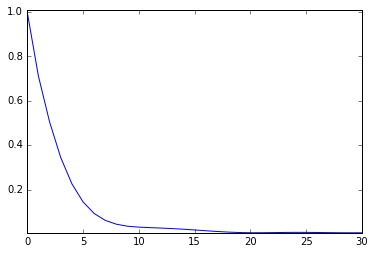

In [65]:
results = plot_correlation(blocks, 0, 30)

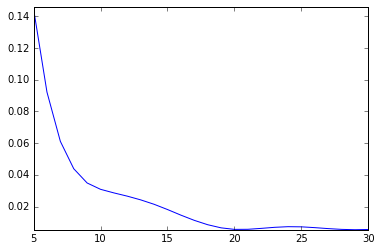

In [66]:
results = plot_correlation(blocks, 5, 30)

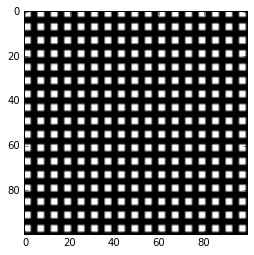

In [68]:
blocks = np.zeros((100,100), dtype=np.float)
block_size = 3
for (x,y),value in np.ndenumerate(blocks):
    if x%(block_size*2) < block_size and y%(block_size*2) < block_size:
        blocks[x,y] = 1
pylab.imshow(blocks, cmap='Greys_r');

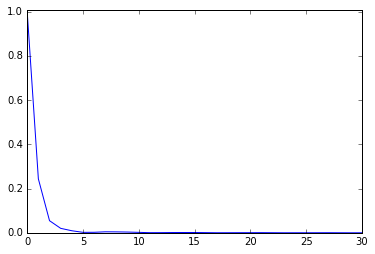

In [69]:
results = plot_correlation(blocks, 0, 30)

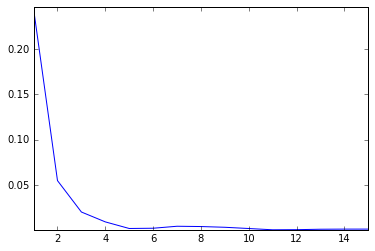

In [71]:
results = plot_correlation(blocks, 1, 15)

In [7]:
pbc_image = np.loadtxt('pbc_image.txt')

In [8]:
pbc_image = pbc_image[:100, :100]
pbc_image.shape

(100, 100)

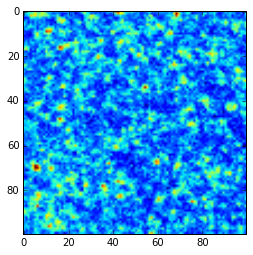

In [9]:
pylab.imshow(pbc_image);#, cmap='Greys_r');

0 0.379074471354
1 0.201879015258
2 0.128438592067
3 0.0917643448769
4 0.0704066705267
5 0.056452272283
6 0.0466866904618
7 0.0394289683101
8 0.0338472612422
9 0.0292622632441
10 0.0255114920929
11 0.0224560621168
12 0.0199243156361
13 0.0177713381057
14 0.0158418960286
15 0.014130701913
16 0.0126337067271
17 0.0113710901721
18 0.0102849473734
19 0.00933829026672
20 0.0084832700995
21 0.00773378769748
22 0.00706774135981
23 0.00647580978028
24 0.00593474587086
25 0.00543432501981
26 0.00498137104535
27 0.00457262508536
28 0.00420078701257
29 0.00385906236898
30 0.0035376583692
31 0.00323362663005
32 0.00294680164767
33 0.00268283044983
34 0.00244286795989
35 0.0022206720716
36 0.00201378036123
37 0.0018265910516
38 0.00165595911444
39 0.00149630311864
40 0.00134164662304
41 0.00119311724931
42 0.00105680046414
43 0.000932730892817
44 0.000824167272414
45 0.000731757045157
46 0.000652578048404
47 0.000586662463343
48 0.000534308998807
49 0.000505983737299
50 0.000502038867031
51 0.00050

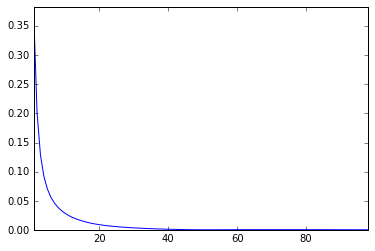

In [93]:
results = plot_correlation(pbc_image, 1, 99)

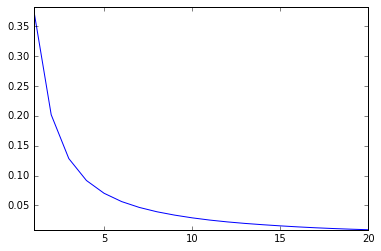

In [89]:
results = plot_correlation(pbc_image, 1, 20)

In [94]:
#results = plot_correlation(pbc_image, 1, 99)
dx = 0.225 #nm / pixel
correlation_length = np.sum(results)*dx
print("Correlation Length: {} nm".format(correlation_length))

Correlation Length: 0.3057704842666345 nm


In [37]:
def correlation_length(m2s, dx):
    #dx should be in nm / pixel
    correlation_length = np.sum(m2s)*dx
    print("Correlation Length: {} nm".format(correlation_length))
    return correlation_length

In [95]:
# What happens if we only look at the center 3/4 of the image?

0 0.363627326507
1 0.184685323544
2 0.111813662568
3 0.0763344842516
4 0.056734121014
5 0.044829748046
6 0.0369620182397
7 0.0312832483595
8 0.0268733627671
9 0.0231962812695
10 0.0202802398977
11 0.0178639036789
12 0.0158220120146
13 0.0140702245986
14 0.0124979100048
15 0.0110887019573
16 0.00978094584115
17 0.00861318051212
18 0.00759253106606
19 0.0067152452196
20 0.0059391473873
21 0.00528842715975
22 0.00472830260546
23 0.00425434130172
24 0.00386970029566
25 0.00356301997149
26 0.00332459156972
27 0.00313830507989
28 0.00300031339033
29 0.00290238745643
30 0.0028324134291
31 0.0027899916865
32 0.00278201615441
33 0.00280272825523
34 0.00285325262252
35 0.0029270112547
36 0.00302815295575
37 0.00316309443851
38 0.00330305079593
39 0.00342853451024
40 0.00353602986095
41 0.00364180842818
42 0.00374451777148
43 0.00384532663964
44 0.00394348968036
45 0.00403126580893
46 0.00411586539592
47 0.00419406718143
48 0.00426269018321
49 0.00431871595183
50 0.00436439213618
51 0.00440004565

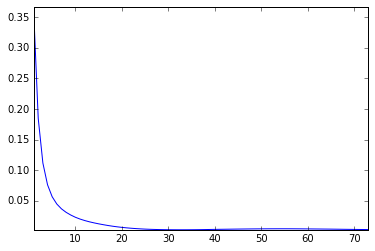

In [97]:
results2 = plot_correlation(pbc_image[:75, :75], 1, 74)

In [14]:
M238 = np.loadtxt('238C_tau_map_97by97.txt')
M238 = M238[:,1:]

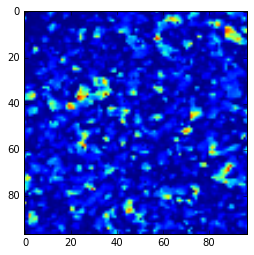

In [17]:
pylab.imshow(M238);

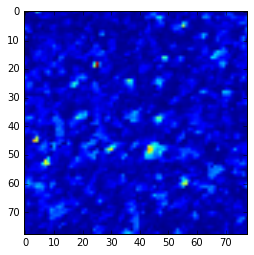

In [22]:
M242 = np.loadtxt('242C_tau_map_78by78.txt')
M242 = M242[:,1:]
pylab.imshow(M242);

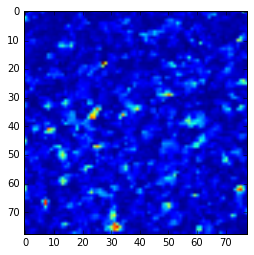

In [23]:
M246 = np.loadtxt('246C_tau_map_78by78.txt')
M246 = M246[:,1:]
pylab.imshow(M246);

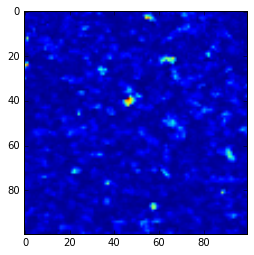

In [24]:
M250 = np.loadtxt('250C_tau_map_100by100.txt')
M250 = M250[:,1:]
pylab.imshow(M250);

0 0.468279221865
1 0.259886338083
2 0.165196557201
3 0.114890530361
4 0.0843752018592
5 0.0642716374534
6 0.050234326662
7 0.0399820754554
8 0.0323387390147
9 0.0264357580374
10 0.0218798332131
11 0.018377551247
12 0.0156401741805
13 0.0134464633005
14 0.0116641973939
15 0.0101994982679
16 0.00899165476257
17 0.00794748480914
18 0.00701868951396
19 0.00618500927103
20 0.00543120307681
21 0.00475386811224
22 0.00415009606468
23 0.00359609077568
24 0.00309294808175
25 0.00265787363632
26 0.00227075029897
27 0.00192508237486
28 0.00162199534484
29 0.00136345177929
30 0.0011530137748
31 0.000985880798306
32 0.00085531233023
33 0.000749128548855
34 0.000650287554532
35 0.000564573939216
36 0.000493862978242
37 0.000428510065632
38 0.000368336203291
39 0.000313016101428
40 0.000266313453963
41 0.000228659555271
42 0.000197631978017
43 0.0001745447899
44 0.000157888268131
45 0.000142750849249
46 0.000126076177264
47 0.000117295003351
48 0.000128829774928
49 0.000145081504107


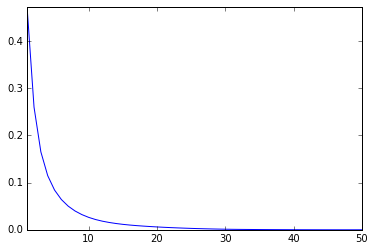

In [25]:
M238_results = plot_correlation(M238,1,50)

In [28]:
correlation_length(M238_results, 0.251) #0.36805417508151794

Correlation Length: 0.36805417508151794 nm


0 0.404543116361
1 0.209808354886
2 0.12895341105
3 0.0890825480161
4 0.0670893519399
5 0.0533829978433
6 0.0438698306509
7 0.0367367972425
8 0.0312229557579
9 0.0269114798886
10 0.0233759543444
11 0.0204963870083
12 0.0181685175208
13 0.0162273522078
14 0.0145708484574
15 0.0130779330923
16 0.0117101977271
17 0.0104444138642
18 0.00935215047515
19 0.00840398518522
20 0.00753995085454
21 0.00677467371377
22 0.0061044508948
23 0.00551409679621
24 0.00497394102272
25 0.00445038315294
26 0.00393568912172
27 0.00346517656216
28 0.00304359417872
29 0.00265261990789
30 0.00229297509702
31 0.00197625405651
32 0.00173274030417
33 0.00157417337823
34 0.0014751626905
35 0.00139884060095
36 0.00133676579791
37 0.00130176344643
38 0.00133444331442
39 0.00143256574747
40 0.00156466931515
41 0.00170456005532
42 0.00183902842703
43 0.00197506988534
44 0.00211356391503
45 0.00223840996903
46 0.00232977321531
47 0.00238117360653
48 0.00239672221384
49 0.0023963378366
Correlation Length: 0.4364837903570

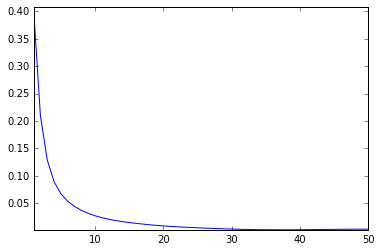

In [30]:
M242_results = plot_correlation(M242,1,50)
correlation_length(M242_results, 0.33) #0.43648379035700346

0 0.3818042893
1 0.193927424058
2 0.117079753509
3 0.0784576556028
4 0.0562688860768
5 0.0426085349449
6 0.0336329932183
7 0.0272967360483
8 0.0226544039001
9 0.019075425601
10 0.0162789330085
11 0.0140239333516
12 0.0122278602666
13 0.010700375864
14 0.00937543167848
15 0.00822477506415
16 0.00725562575072
17 0.00646417066213
18 0.00580897595209
19 0.00526604518403
20 0.00482130345106
21 0.00445661405
22 0.00414170536898
23 0.00386081251631
24 0.0036255493081
25 0.00343522910856
26 0.00328997855869
27 0.00317399732742
28 0.00307692517746
29 0.00299322167579
30 0.00293938965482
31 0.00291158985658
32 0.00290480429005
33 0.00291149064854
34 0.00292398650008
35 0.00293501459681
36 0.00294459500193
37 0.00295853965998
38 0.00300593171246
39 0.00307477759811
40 0.00315036895422
41 0.00322370760449
42 0.00329956555421
43 0.00338458208487
44 0.00347873855443
45 0.00357772152299
46 0.00366533241657
47 0.00372420933283
48 0.00377319150227
49 0.00380391319886
Correlation Length: 0.3860666752235

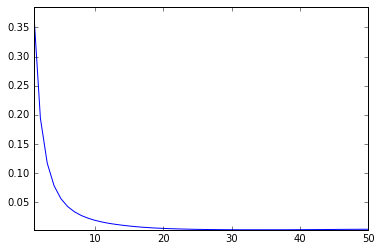

In [31]:
M246_results = plot_correlation(M246,1,50)
correlation_length(M246_results, 0.33) #0.38606667522351107

0 0.459573978769
1 0.248807060793
2 0.151288983833
3 0.098582758551
4 0.0684318104446
5 0.0501582979759
6 0.0383815446145
7 0.0304247235536
8 0.0247590399865
9 0.0206338904881
10 0.0175259116927
11 0.0151276471645
12 0.0132367358096
13 0.0117381246412
14 0.0104973420177
15 0.00945342514634
16 0.00860410231419
17 0.00788077309299
18 0.0072123881466
19 0.00659831411285
20 0.00604508581412
21 0.00554454813474
22 0.00507715675703
23 0.00464219950885
24 0.00424356544954
25 0.00386828747549
26 0.0035257382411
27 0.00321083951223
28 0.0029173306383
29 0.00264679679831
30 0.00240372783237
31 0.00218688861995
32 0.00199286248723
33 0.00181868511779
34 0.00165950317826
35 0.00150856717426
36 0.00137327653509
37 0.00125658682072
38 0.00115974875507
39 0.0010824304472
40 0.00102677284077
41 0.000988718884194
42 0.000958984925438
43 0.000934822296521
44 0.000915489804776
45 0.000899506316634
46 0.000886013638993
47 0.000872025494908
48 0.000864084353499
49 0.000873857225228
Correlation Length: 0.34

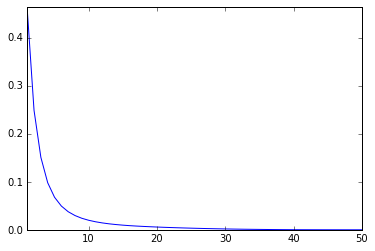

In [32]:
M250_results = plot_correlation(M250,1,50)
correlation_length(M250_results, 0.251) #0.3429415395108926

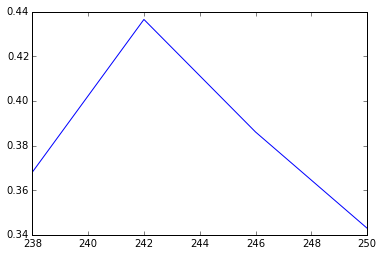

In [6]:
x, y = [238, 242, 246, 250], [0.36805417508151794, 0.43648379035700346, 0.38606667522351107, 0.3429415395108926]
pylab.plot(x,y);

0 0.0293126724128
Correlation Length: 0.0073574807756173295 nm
3 0.00735748077562
0 0.0457279853535
1 0.0253147706987
Correlation Length: 0.01783173176910796 nm
4 0.0178317317691
0 0.0660483781828
1 0.00357437311416
2 0.0173280450185
Correlation Length: 0.021824649875169966 nm
5 0.0218246498752
0 0.0830858106429
1 0.0163389563818
2 0.00613692694034
3 0.00658930620814
Correlation Length: 0.028149901043473816 nm
6 0.0281499010435
0 0.0847287191231
1 0.0230555827968
2 0.0039006454691
3 0.00605694802496
4 0.00521420350607
Correlation Length: 0.030861980828926907 nm
7 0.0308619808289
0 0.109675137702
1 0.0273283034008
2 0.00638456603483
3 0.00485556832503
4 0.00550477008515
5 0.00457377166067
Correlation Length: 0.039738851419211046 nm
8 0.0397388514192
0 0.15947957587
1 0.0441394713567
2 0.0106260148094
3 0.0048133622178
4 0.00760328436089
5 0.00721704531649
6 0.00590644488437
Correlation Length: 0.06018608490280936 nm
9 0.0601860849028
0 0.2168882075
1 0.073046731763
2 0.0202097302844
3 0

/Users/jjmaldonis/anaconda/envs/meraki/lib/python3.5/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1, right=1
  'left=%s, right=%s') % (left, right))


KeyboardInterrupt: 

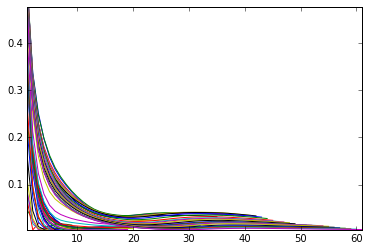

In [38]:
lengths = []
for i in range(3, 98):
    M238_results = plot_correlation(M238[:i,:i], 1, i-1)
    cl = correlation_length(M238_results, 0.251)
    lengths.append(cl)
    print(i, cl)

0 0.47363273414
1 0.267757124975
2 0.175829008788
3 0.12781101887
4 0.0991394915766
5 0.0803010537263
6 0.0668914944656
7 0.0563977726877
8 0.0477127332295
9 0.0402960402922
10 0.0341052141787
11 0.029027067505
12 0.024954334835
13 0.0215795778173
14 0.018695725605
15 0.016249886232
16 0.0141994432587
17 0.0124729486053
18 0.0109780171351
19 0.00963738659239
20 0.00843181907525
21 0.00738141325801
22 0.0065178362746
23 0.00578680274884
24 0.00520192228449
25 0.00479708394231
26 0.00455990791653
27 0.00449734641019
28 0.00459101056319
29 0.00480327597385
30 0.0051778144862
31 0.00568235276816
32 0.00621689471387
33 0.00673821197322
34 0.00721990231399
35 0.00761429960703
36 0.00790152430403
37 0.00807720375865
38 0.00816382025539
39 0.00821281217768
40 0.00819147610933
41 0.00810898944252
42 0.00796789452474
43 0.00779667336854
44 0.00761747662744
45 0.00743518519649
46 0.00725204832686
47 0.00705547348308
48 0.00685583253038
49 0.00667903397698
50 0.00652617016734
51 0.00637919775485
5

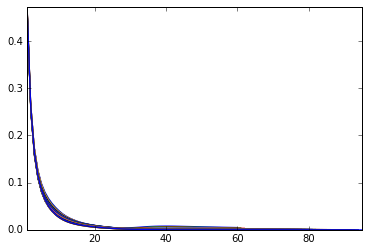

In [39]:
lengths = []
for i in range(62, 98):
    M238_results = plot_correlation(M238[:i,:i], 1, i-1)
    cl = correlation_length(M238_results, 0.251)
    lengths.append(cl)
    print(i, cl)

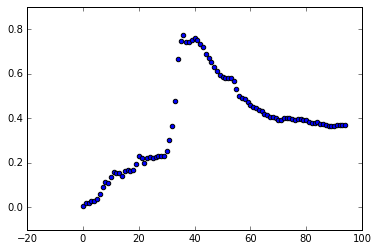

In [42]:
image_size_vs_correlation_length = [0.007357481, 0.017831732, 0.02182465, 0.028149901, 0.030861981, 0.039738851, 0.060186085, 0.092819433, 0.112068619, 0.111182925, 0.137537585, 0.158236585, 0.156540694, 0.15377388, 0.143244528, 0.16298586, 0.170003682, 0.164542632, 0.168987645, 0.19551322, 0.228525134, 0.223808149, 0.201232417, 0.21948017, 0.225671098, 0.222995395, 0.22451923, 0.232087402, 0.229378344, 0.230351701, 0.2550745, 0.302853743, 0.364739162, 0.477261365, 0.663570939, 0.746673969, 0.770691445, 0.739960613, 0.741741447, 0.74877039, 0.75971259, 0.749091897, 0.731749084, 0.71730063, 0.687595766, 0.667705826, 0.650233024, 0.629646944, 0.612725765, 0.593638959, 0.583976229, 0.580094068, 0.579501372, 0.578404016, 0.567070607, 0.529536856, 0.500397291, 0.490827571, 0.485617451, 0.474070278, 0.460437408, 0.449875499, 0.444017565, 0.438159703, 0.431922272, 0.420956257, 0.412801145, 0.406610348, 0.404204635, 0.402858494, 0.391369109, 0.392362979, 0.399689992, 0.400737441, 0.398746019, 0.394950465, 0.392152824, 0.396596152, 0.395998472, 0.394117494, 0.392747909, 0.383462484, 0.376628595, 0.377896681, 0.38232403, 0.375834471, 0.371930495, 0.369560937, 0.366176024, 0.366061082, 0.366460708, 0.367871673, 0.368857493, 0.369061212, 0.370058346]
pylab.scatter(range(len(image_size_vs_correlation_length)), image_size_vs_correlation_length);

0 0.00937347098881
Correlation Length: 0.0030932454263068424 nm
3 0.00309324542631
0 0.0462167898231
1 0.058956318345
Correlation Length: 0.03470712569548873 nm
4 0.0347071256955
0 0.0507545174974
1 0.024341961594
2 0.0352396997946
Correlation Length: 0.03641093903239214 nm
5 0.0364109390324
0 0.0939690697123
1 0.0190355166453
2 0.0185634814245
3 0.0222492572071
Correlation Length: 0.05075971724639374 nm
6 0.0507597172464
0 0.0770793314498
1 0.0198961534403
2 0.00743730708362
3 0.00937617972833
4 0.00959034030963
Correlation Length: 0.040715172963866016 nm
7 0.0407151729639
0 0.0895242627476
1 0.0244700856219
2 0.0104362946471
3 0.00689464487547
4 0.00818767036563
5 0.00869460155395
Correlation Length: 0.04890849473782318 nm
8 0.0489084947378
0 0.105294498539
1 0.0272136965629
2 0.0175731575404
3 0.0104293710001
4 0.00922018137882
5 0.0102159568316
6 0.0117365278752
Correlation Length: 0.06325551861038828 nm
9 0.0632555186104
0 0.124399817992
1 0.0284901093947
2 0.0102509290023
3 0.005

/Users/jjmaldonis/anaconda/envs/meraki/lib/python3.5/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1, right=1
  'left=%s, right=%s') % (left, right))


KeyboardInterrupt: 

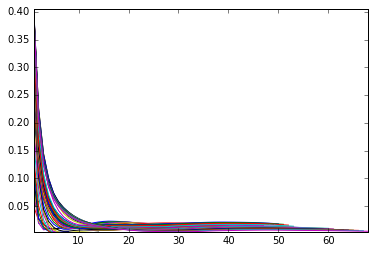

In [43]:
lengths = []
for i in range(3, 77):
    M242_results = plot_correlation(M242[:i,:i], 1, i-1)
    cl = correlation_length(M242_results, 0.33)
    lengths.append(cl)
    print(i, cl)

0 0.401955169845
1 0.206705824323
2 0.125498868614
3 0.0855424827773
4 0.0635238786406
5 0.049876104687
6 0.0405484882896
7 0.0336371410245
8 0.0282319732475
9 0.0238705321462
10 0.0204241581389
11 0.0177062706674
12 0.015537490412
13 0.0137964918288
14 0.0123407603197
15 0.0110528599191
16 0.00990397662929
17 0.00887383880357
18 0.00793824405118
19 0.00710711385221
20 0.00634960257125
21 0.00568305581076
22 0.00516381023045
23 0.00483042077255
24 0.00461329467812
25 0.00442369117915
26 0.00423803369788
27 0.00408170441662
28 0.00399651587108
29 0.00400684565428
30 0.00408456761954
31 0.00419397166242
32 0.00434255316795
33 0.00455247215702
34 0.00486862011694
35 0.00524241322251
36 0.00558282828189
37 0.00583798907334
38 0.00602733669958
39 0.00618984642123
40 0.00635494131946
41 0.00652335971691
42 0.0066614217571
43 0.00677555542473
44 0.00687790195069
45 0.00696747047199
46 0.00703231135343
47 0.00704494985972
48 0.00699636781641
49 0.00690371562965
50 0.00680491734224
51 0.0066963

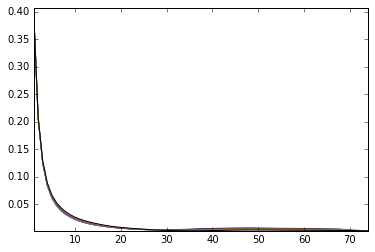

In [44]:
lengths = []
for i in range(70, 77):
    M242_results = plot_correlation(M242[:i,:i], 1, i-1)
    cl = correlation_length(M242_results, 0.33)
    lengths.append(cl)
    print(i, cl)